# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [82]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [83]:
browser = Browser('chrome')

### Step 1: Visit the Website - Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.


In [84]:
# Visit the website # https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table - Create a Beautiful Soup object and use it to scrape the data in the HTML table.

In [85]:
# Gather the html from the current page in the browser
html = browser.html

In [86]:
# Create a Beautiful Soup Object
soup = soup(html, 'html.parser')

In [87]:
# Extract all rows of data
table = soup.find('table', class_ = 'table')
# table

### Step 3: Store the Data

#### --------Web scraping with splinter and beatifulsoup used--------

In [88]:
# Create an empty list
columns = []
info = []

In [89]:
# Loop through to get header of table
header = table.find_all('th')
for h in header:
    columns.append(h.text)
print(columns)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']


In [90]:
# data in table
data = table.find_all('tr', class_ = 'data-row')
# data

In [91]:
#Loop through the scraped data to create a list of rows
for d in data:
    input = d.find_all('td')
    info.append(
        [i.text for i in input])
# print(info)

In [92]:
# header columns to Pandas df
data_df = pd.DataFrame.from_records(info, columns=columns)


In [93]:
# Confirm DataFrame was created successfully
data_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


## --------------------------------------------------

#### ----------------Pandas pd.read_html() funtion used----------------

In [94]:
table_rd_df = pd.read_html('https://static.bc-edx.com/data/web/mars_facts/temperature.html')

In [95]:
mars_df = table_rd_df[0]
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


## ---------------------------------------------------

### Step 4: Prepare Data for Analysis - Pandas df (mars_df) used for analysis


In [96]:
# Examine data type of each column
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [97]:
# Change data types for data analysis
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])

In [98]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data


In [99]:
# 1. How many months are there on Mars?
mars_months = mars_df['month'].value_counts().sort_index()
mars_months

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64

In [100]:
# 2. How many Martian days' worth of data are there?
mars_days = mars_df['sol'].count()
mars_days


1867

In [101]:
# 3. What is the average low temperature by month?
low_by_month = mars_df.groupby('month')['min_temp'].mean()
low_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

Text(0.5, 0, 'Month')

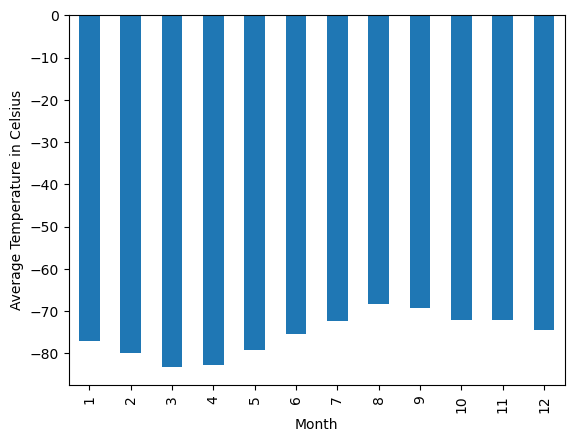

In [102]:
# Plot the average temperature by month
low_by_month.plot(kind='bar')
plt.ylabel('Average Temperature in Celsius')
plt.xlabel("Month")

Text(0.5, 0, 'Month')

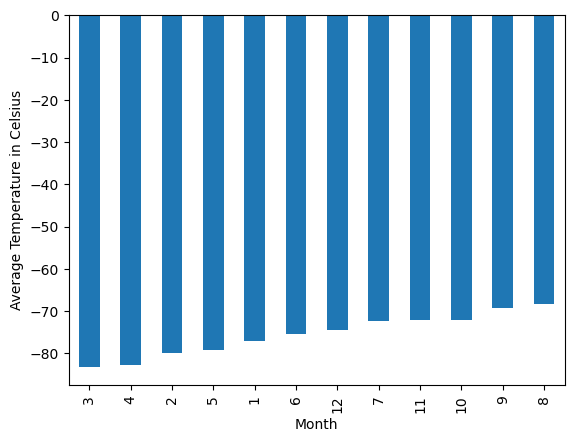

In [103]:
# Identify the coldest and hottest months in Curiosity's location
cold_hot_months = low_by_month.sort_values(ascending = True)
cold_hot_months.plot(kind = 'bar')
plt.ylabel('Average Temperature in Celsius')
plt.xlabel("Month")

In [104]:
# 4. Average pressure by Martian month
avg_pressure_month = mars_df.groupby('month')['pressure'].mean()
avg_pressure_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

Text(0.5, 0, 'Month')

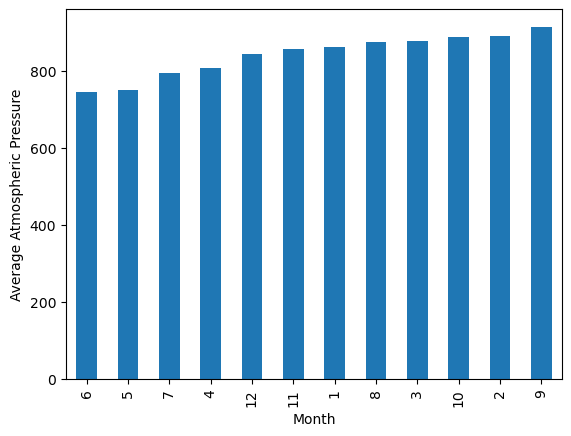

In [105]:
# Plot the average pressure by month
avg_p_m_plot = avg_pressure_month.sort_values(ascending= True)
avg_p_m_plot.plot(kind= 'bar')
plt.ylabel('Average Atmospheric Pressure')
plt.xlabel("Month")

Text(0.5, 0, 'Number of Terrestrial Days')

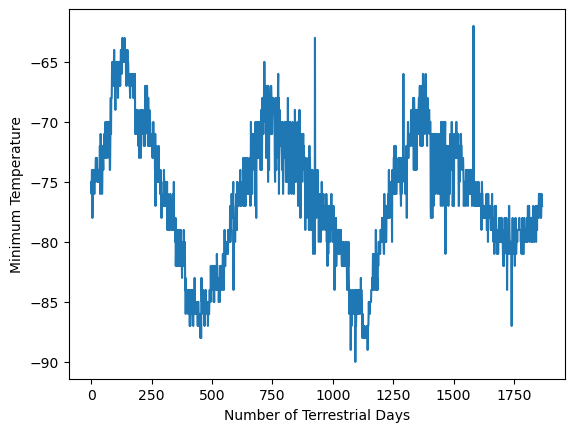

In [106]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.plot(mars_df['min_temp'])
plt.ylabel('Minimum Temperature')
plt.xlabel("Number of Terrestrial Days")

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [107]:
# Write the data to a CSV
mars_df.to_csv('mars_df.csv', index = False, header = True)

In [108]:
browser.quit()